# Machine learning concepts and code


Remember to include explanations of key themes, concepts, decisions taken and reference using the required Harvard Style Reference standard (not counted in your word count and to be included in your .ipynb submission)


Created by: Samuel Munaf

2023


# Introduction 

The following reports highlights the process of detecting ....

Using these methods....

The aim is to.....



In [ ]:
# Importing display and markdown

from IPython.display import display, Markdown

url = "https://jupyter.org/assets/share.png"

display(Markdown(f"![Image]({url})"))


# 1/. Importing data


In [51]:
############# Google collab import code #########################################

#from google.colab import files							#
#uploaded = files.upload()							#
										#
#import io									#
# For CSV file									#
#import pandas as pd								#
#df_csv = pd.read_csv(io.BytesIO(uploaded['filename.csv']))			#
										#
# For Excel file								#
#df_excel = pd.read_excel(io.BytesIO(uploaded['filename.xlsx']))		#
										#
# For text file									#
#text_content = io.StringIO(uploaded['filename.txt'].decode('utf-8')).read()	#
										#
#################################################################################




import pandas as pd

# Load the dataset into a DataFrame
df = pd.read_csv('diabetes.csv')

# Display the first few rows of the dataset to verify
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age Outcome  
0                     0.627   50    dead  
1                     0.351   31   alive  
2                     0.672   32    dead  
3                     0.167   21   alive  
4                     2.288   33    dead  


# Data exploration


In [52]:
# 1.1: General Information
# Get general information about the dataset such as number of rows, columns, data types, etc.
print("\nGeneral Information:")
print(df.info())

# 1.2: Descriptive Statistics
# Compute basic statistics for the numeric columns like mean, median, standard deviation, etc.
print("\nDescriptive Statistics:")
print(df.describe())


General Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB
None

Descriptive Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.

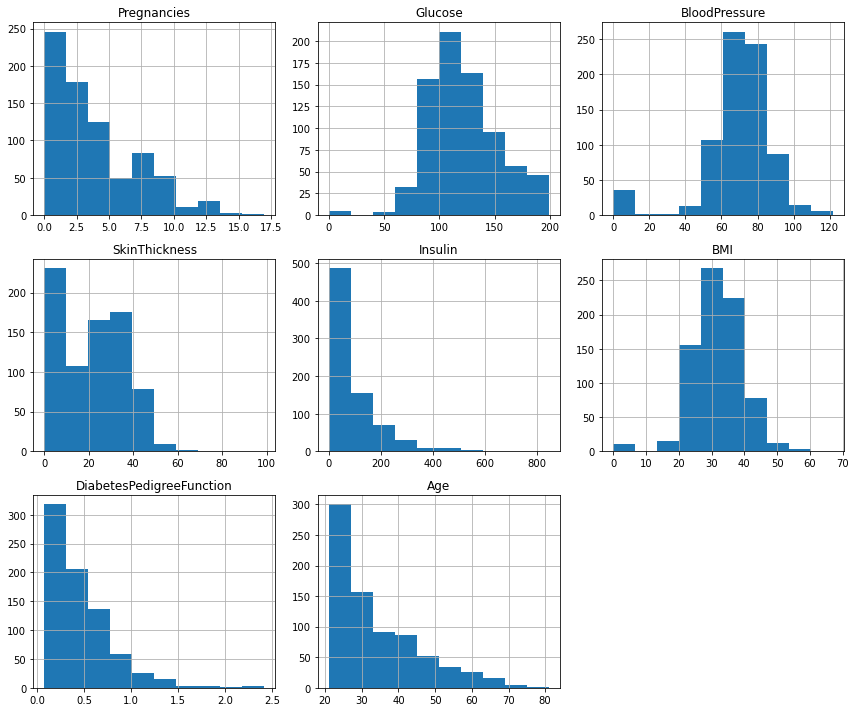

In [53]:
# 1.3: Visual Exploration (using matplotlib and seaborn for visualization)
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numeric columns
# This gives a visual representation of the distribution of data in each column
df.hist(figsize=(12, 10))
plt.tight_layout()  # Ensures better layout for plots
plt.show()

# 2/. Data cleaning


In [54]:
# 2.2 Duplicates

# Detect duplicate rows based on all columns
duplicate_rows = df[df.duplicated()]
print(f"\nNumber of duplicate rows: {duplicate_rows.shape[0]}")

# If duplicates exist, you can choose to drop them
if not duplicate_rows.empty:
    df.drop_duplicates(inplace=True)
    print("Duplicate rows removed!")



Number of duplicate rows: 0


In [55]:
# 2.2 Missing values

# Display count of missing values per column
missing_values = df.isnull().sum()
print("\nMissing Values per Column:")
print(missing_values)

# Handling missing values: Depending on the nature of your data, you can:
# 1. Drop rows with missing values (not always recommended as it might result in significant data loss)
# 2. Fill missing values with a specific value, mean, median, or mode.
# Here, we'll demonstrate filling missing values with the median of the column:

for column in df.columns:
    if df[column].isnull().sum() > 0:  # if there are missing values in the column
        median_val = df[column].median()
        df[column].fillna(median_val, inplace=True)

# Verify if any missing values remain
print("\nMissing values after handling:", df.isnull().sum().max())


Missing Values per Column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Missing values after handling: 0


In [56]:
# 2.3: Detect and Handle Outliers
# -------------------------------
# One common method to detect outliers is using the Interquartile Range (IQR).
# Note: This method is applied column-wise for numerical columns.

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Determine bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = ((df < lower_bound) | (df > upper_bound)).sum()
print("\nNumber of outliers per column:")
print(outliers)




Number of outliers per column:
Age                          9
BMI                         19
BloodPressure               45
DiabetesPedigreeFunction    29
Glucose                      5
Insulin                     34
Outcome                      0
Pregnancies                  4
SkinThickness                1
dtype: int64


C:\Users\Owner\AppData\Local\Temp/ipykernel_7560/2232579423.py:15: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < lower_bound) | (df > upper_bound)).sum()


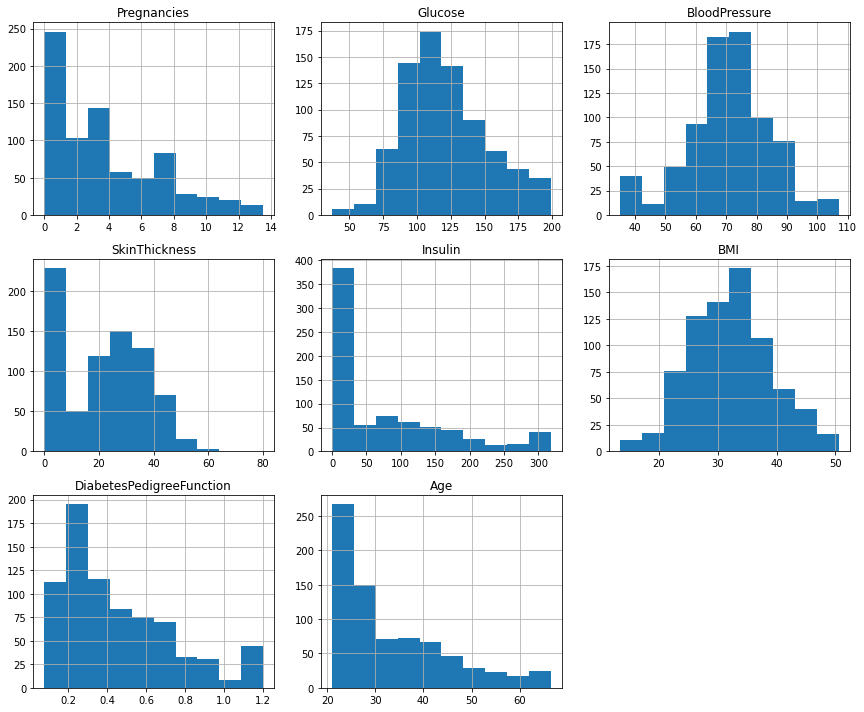

In [57]:
# For simplicity, cap the outliers to the bounds only for columns that have outliers
for column, count in outliers.items():
    if count > 0:  # Only columns with outliers
        df[column] = df[column].clip(lower_bound[column], upper_bound[column])

# Verify the effect of outlier handling by plotting the data again
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# 3/. Data transformation

3. Decision Justification

Including BMI Categories: Obesity is a known risk factor for several health complications. Categorizing BMI helps to succinctly capture this risk factor.

## 3.1 Formatting


In [58]:

# Converting "Outcome" to a category and examining the frequency

df['Outcome'] = df['Outcome'].astype('category')

# Recode the outcome variable

# Convert 'Outcome' column values
df['Outcome'] = df['Outcome'].replace({'dead': 1, 'alive': 0})



frequency_by_class = df['Outcome'].value_counts()
print(frequency_by_class)


0    500
1    268
Name: Outcome, dtype: int64


## 3.2 Adding features 


In [59]:

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


# Categorise BMI and drop the original column

def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal'
    elif 24.9 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_category'] = df['BMI'].apply(categorize_bmi)

df = df.drop(columns=['BMI'])

df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome,age_group,BMI_category
0,6.0,148.0,72.0,35.0,0.0,0.627,50.0,1,51-60,Obese
1,1.0,85.0,66.0,29.0,0.0,0.351,31.0,0,31-40,Overweight
2,8.0,183.0,64.0,0.0,0.0,0.672,32.0,1,31-40,Normal
3,1.0,89.0,66.0,23.0,94.0,0.167,21.0,0,21-30,Overweight
4,0.0,137.0,40.0,35.0,168.0,1.200,33.0,1,31-40,Obese
...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,0.171,63.0,0,61-70,Obese
764,2.0,122.0,70.0,27.0,0.0,0.340,27.0,0,21-30,Obese
765,5.0,121.0,72.0,23.0,112.0,0.245,30.0,0,31-40,Overweight
766,1.0,126.0,60.0,0.0,0.0,0.349,47.0,1,41-50,Obese


In [60]:
# Frequency of BMI categories

frequency_table = df['BMI_category'].value_counts()
print(frequency_table)



Obese          477
Overweight     175
Normal         101
Underweight     15
Name: BMI_category, dtype: int64


## 3.3 Encoding categorical variables (One-hot encoding)

In [61]:
# Using one-hot encoding for the 'age_group' and 'BMI' columns
df = pd.get_dummies(df, columns=['age_group'], drop_first=True)
df = pd.get_dummies(df, columns=['BMI_category'], drop_first=True)

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome,age_group_11-20,age_group_21-30,age_group_31-40,age_group_41-50,age_group_51-60,age_group_61-70,age_group_71-80,age_group_81-90,age_group_91-100,BMI_category_Obese,BMI_category_Overweight,BMI_category_Underweight
0,6.0,148.0,72.0,35.0,0.0,0.627,50.0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,1.0,85.0,66.0,29.0,0.0,0.351,31.0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,8.0,183.0,64.0,0.0,0.0,0.672,32.0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,1.0,89.0,66.0,23.0,94.0,0.167,21.0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,0.0,137.0,40.0,35.0,168.0,1.200,33.0,1,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,0.171,63.0,0,0,0,0,0,0,1,0,0,0,1,0,0
764,2.0,122.0,70.0,27.0,0.0,0.340,27.0,0,0,1,0,0,0,0,0,0,0,1,0,0
765,5.0,121.0,72.0,23.0,112.0,0.245,30.0,0,0,0,1,0,0,0,0,0,0,0,1,0
766,1.0,126.0,60.0,0.0,0.0,0.349,47.0,1,0,0,0,1,0,0,0,0,0,1,0,0


## 3.4 Normalising

In many machine learning algorithms, the scale of features directly influences the model's performance. Features with larger scales can disproportionately influence the outcome, especially in algorithms that rely on distances or gradients.

Normalization typically means adjusting values measured on different scales to a common scale. One common method is Min-Max normalization, which scales features to lie between a given minimum and maximum value, usually between 0 and 1.





In [62]:
from sklearn.preprocessing import MinMaxScaler

# List of columns to normalize (excluding non-numeric and target columns)
cols_to_normalize = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age']

scaler = MinMaxScaler()

df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

df



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome,age_group_11-20,age_group_21-30,age_group_31-40,age_group_41-50,age_group_51-60,age_group_61-70,age_group_71-80,age_group_81-90,age_group_91-100,BMI_category_Obese,BMI_category_Overweight,BMI_category_Underweight
0,0.444444,0.684942,0.513889,0.4375,0.000000,0.489305,0.637363,1,0,0,0,0,1,0,0,0,0,1,0,0
1,0.074074,0.295753,0.430556,0.3625,0.000000,0.243316,0.219780,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0.592593,0.901158,0.402778,0.0000,0.000000,0.529412,0.241758,1,0,0,1,0,0,0,0,0,0,0,0,0
3,0.074074,0.320463,0.430556,0.2875,0.295481,0.079323,0.000000,0,0,1,0,0,0,0,0,0,0,0,1,0
4,0.000000,0.616988,0.069444,0.4375,0.528094,1.000000,0.263736,1,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.740741,0.394595,0.569444,0.6000,0.565815,0.082888,0.923077,0,0,0,0,0,0,1,0,0,0,1,0,0
764,0.148148,0.524324,0.486111,0.3375,0.000000,0.233512,0.131868,0,0,1,0,0,0,0,0,0,0,1,0,0
765,0.370370,0.518147,0.513889,0.2875,0.352063,0.148841,0.197802,0,0,0,1,0,0,0,0,0,0,0,1,0
766,0.074074,0.549035,0.347222,0.0000,0.000000,0.241533,0.571429,1,0,0,0,1,0,0,0,0,0,1,0,0


## 3.5 Splitting the dataset

This ensures that the testing set remains a genuine representation of the real-world distribution, which is crucial for evaluating the model's performance accurately.




In [63]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)  # Features (excluding target variable)
y = df['Outcome']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training, 30% testing

# Print the frequency of each class in the training set
print("Training data class frequencies:\n", y_train.value_counts())

# Print the frequency of each class in the testing set
print("\nTesting data class frequencies:\n", y_test.value_counts())



Training data class frequencies:
 0    349
1    188
Name: Outcome, dtype: int64

Testing data class frequencies:
 0    151
1     80
Name: Outcome, dtype: int64


## 3.6 SMOTE 

SMOTE stands for Synthetic Minority Over-sampling Technique. If your target classes are imbalanced, i.e., one class has many more samples than the other, it can lead to poor model performance, especially for the minority class. SMOTE helps by generating synthetic samples in the feature space.

In [64]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Print frequency after SMOTE
print("Class frequencies after SMOTE in training data:\n", y_train_resampled.value_counts())

Class frequencies after SMOTE in training data:
 0    349
1    349
Name: Outcome, dtype: int64


# 4/. Model training

For sections 4-6 you must make use of academic research and references to defend the model choices and discuss the implications of the outputs to the given scenario.

## 4.1. Naive model

For a binary classification task, one of the simplest naïve models is to predict the most frequent class (either 0 or 1) for all instances. For instance, if the majority of your samples are labeled as "alive" (i.e., 0), then this model will predict "alive" for any input.

The Simple Naïve Model provides a basic understanding of what the accuracy would be if we always predicted the most common class. It serves as a sanity check and baseline. If your advanced models can't outperform this, it's an indication that something might be wrong with how they are implemented or trained.

The next steps would involve comparing this baseline with more complex models to see how much improvement can be gained.


In [72]:
# Determine the most frequent class in the training data
naive_prediction = y_train.mode()[0]

#To make predictions on your test set, you will assign the naive_prediction value to all samples.
y_naive_pred = [naive_prediction] * len(y_test)

#Evaluate: To evaluate the model, you can use various metrics like accuracy, precision, recall, etc


from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix

# Generate confusion matrix for naïve predictions
cm = confusion_matrix(y_test, y_naive_pred)

# Extracting the values
TN, FP, FN, TP = cm.ravel()

# Display the results in a table format
table = f"""
+-----------------+------------------++-----------------+------------------+
| Actual\Predicted| Positive (1)     | Negative (0)                        |
+-----------------+------------------++-----------------+------------------+

| Positive (1)    | True Positives:  {TP} | False Negatives: {FN}          |
+-----------------+------------------++-----------------+------------------+

| Negative (0)    | False Positives: {FP} | True Negatives:  {TN}          |
+-----------------+------------------++-----------------+------------------+
"""

print(table)




+-----------------+------------------++-----------------+------------------+
| Actual\Predicted| Positive (1)     | Negative (0)                        |
+-----------------+------------------++-----------------+------------------+

| Positive (1)    | True Positives:  0 | False Negatives: 80          |
+-----------------+------------------++-----------------+------------------+

| Negative (0)    | False Positives: 0 | True Negatives:  151          |
+-----------------+------------------++-----------------+------------------+



In [73]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Calculate metrics for the naive model
accuracy = accuracy_score(y_test, y_naive_pred) * 100
recall = recall_score(y_test, y_naive_pred) * 100
precision = precision_score(y_test, y_naive_pred, zero_division=0) * 100
f1 = f1_score(y_test, y_naive_pred, zero_division=0) * 100

# Display the results
print(f"Accuracy: {accuracy:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"F1-Score: {f1:.2f}%")


Accuracy: 65.37%
Recall: 0.00%
Precision: 0.00%
F1-Score: 0.00%


## 4.2 Logistic regression

Logistic Regression is a statistical method used for analyzing datasets where the outcome is binary. It models the relationship between a set of features and a binary outcome. It estimates probabilities by using a logistic function.
Advantages:

    Interpretability: Coefficients of features can be interpreted in terms of odds-ratios.
    Efficiency: Requires less computational resources as it's relatively straightforward.
    No need for feature scaling: It can work with unscaled features.
    Outputs well-calibrated predicted probabilities.

Disadvantages:

    Assumes a linear decision boundary: Not as flexible as other models.
    Not robust to outliers: Outliers can significantly skew the outcomes.
    Multicollinearity: Features should not be highly correlated with each other



In [76]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)  # Increase max_iter if convergence issues arise
logreg.fit(X_train_resampled, y_train_resampled)


# Model prediction

y_logreg_pred = logreg.predict(X_test)

# Generate confusion matrix for logistic regression predictions
cm_logreg = confusion_matrix(y_test, y_logreg_pred)

# Extracting the values
TN_logreg, FP_logreg, FN_logreg, TP_logreg = cm_logreg.ravel()

# Display the results in a table format for Logistic Regression
table_logreg = f"""
+-----------------+------------------+
| Actual\Predicted| Positive (1)     | Negative (0)     |
+-----------------+------------------+
| Positive (1)    | True Positives:  {TP_logreg} | False Negatives: {FN_logreg} |
+-----------------+------------------+
| Negative (0)    | False Positives: {FP_logreg} | True Negatives:  {TN_logreg} |
+-----------------+------------------+
"""

print("Logistic Regression Confusion Matrix:\n")
print(table_logreg)




Logistic Regression Confusion Matrix:


+-----------------+------------------+
| Actual\Predicted| Positive (1)     | Negative (0)     |
+-----------------+------------------+
| Positive (1)    | True Positives:  62 | False Negatives: 18 |
+-----------------+------------------+
| Negative (0)    | False Positives: 38 | True Negatives:  113 |
+-----------------+------------------+



In [77]:
# Model evaluation

# Calculate metrics for the logistic regression model
accuracy_logreg = accuracy_score(y_test, y_logreg_pred) * 100
recall_logreg = recall_score(y_test, y_logreg_pred) * 100
precision_logreg = precision_score(y_test, y_logreg_pred) * 100
f1_logreg = f1_score(y_test, y_logreg_pred) * 100

# Display the results
print("Logistic Regression Evaluation:\n")
print(f"Accuracy: {accuracy_logreg:.2f}%")
print(f"Recall: {recall_logreg:.2f}%")
print(f"Precision: {precision_logreg:.2f}%")
print(f"F1-Score: {f1_logreg:.2f}%")


Logistic Regression Evaluation:

Accuracy: 75.76%
Recall: 77.50%
Precision: 62.00%
F1-Score: 68.89%


# 5/. Additional model - Random Forrest

1. Description of Random Forest:

Random Forest is an ensemble learning method that constructs a 'forest' of decision trees at training time and outputs the class that is the mode of the classes (classification) or average prediction (regression) of the individual trees.
Advantages:

    Robustness: Can handle missing values and maintains accuracy for missing data.
    High Accuracy: Random Forests avoid overfitting by creating trees on random subsets.
    Feature Importance: Provides insight into the most significant variables.
    Handles Large Data Sets: Can handle large datasets with higher dimensionality.

Disadvantages:

    Complexity: They can become computationally expensive and are slower in generating predictions.
    Less Intuitive: The results of a random forest model can be more difficult to interpret compared to a single decision tree.
    Hyperparameters: Requires tuning to get optimal results.

In [78]:
# Model training

from sklearn.ensemble import RandomForestClassifier

# Initialize and train the random forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Model prediction

y_rf_pred = rf_classifier.predict(X_test)



# Model evaluation

# Calculate metrics for the random forest model
accuracy_rf = accuracy_score(y_test, y_rf_pred) * 100
recall_rf = recall_score(y_test, y_rf_pred) * 100
precision_rf = precision_score(y_test, y_rf_pred) * 100
f1_rf = f1_score(y_test, y_rf_pred) * 100

# Display the results
print("Random Forest Evaluation:\n")
print(f"Accuracy: {accuracy_rf:.2f}%")
print(f"Recall: {recall_rf:.2f}%")
print(f"Precision: {precision_rf:.2f}%")
print(f"F1-Score: {f1_rf:.2f}%")




In [80]:
# Generate confusion matrix for random forest predictions
cm_rf = confusion_matrix(y_test, y_rf_pred)

# Extracting the values
TN_rf, FP_rf, FN_rf, TP_rf = cm_rf.ravel()

# Display the results in a table format for Random Forest
table_rf = f"""
+-----------------+------------------+
| Actual\Predicted| Positive (1)     | Negative (0)     |
+-----------------+------------------+
| Positive (1)    | True Positives:  {TP_rf} | False Negatives: {FN_rf} |
+-----------------+------------------+
| Negative (0)    | False Positives: {FP_rf} | True Negatives:  {TN_rf} |
+-----------------+------------------+
"""

print("Random Forest Confusion Matrix:\n")
print(table_rf)


Random Forest Confusion Matrix:


+-----------------+------------------+
| Actual\Predicted| Positive (1)     | Negative (0)     |
+-----------------+------------------+
| Positive (1)    | True Positives:  56 | False Negatives: 24 |
+-----------------+------------------+
| Negative (0)    | False Positives: 34 | True Negatives:  117 |
+-----------------+------------------+



# 6/. Discussion